# Task 1.1

In [1]:
'''#Intro to Neural Network Modeling 
# Python Neural Network Model of Spray Cooling Test System

>>>>> start CodeP2.1
    V.P. Carey ME249, Spring 2021'''
#import math and numpy packages
import math 
import numpy


#assembling data array
#store array where rows are data vectors [x01, x02, x03, y3]
xydata = []

xydata = [[20./20.2, 13.0/14.5, 310.8/308.0, 30.97/32.4], [20./20.2, 14.5/14.5, 308.0/308.0, 32.3/32.4]]
xydata.append([20./20.2, 15.3/14.5, 306.0/308.0, 31.5/32.4])
xydata.append([20.2/20.2, 13.0/14.5, 310.8/308.0, 30.91/32.4]) 
xydata.append([20./20.2, 14.5/14.5, 308.0/308.0, 32.5/32.4]) 
xydata.append([20./20.2, 15.3/14.5, 306.0/308.0, 31.4/32.4]) 
xydata.append([24./20.2, 13.0/14.5, 310.8/308.0, 35.59/32.4]) 
xydata.append([36./20.2, 14.5/14.5, 308.0/308.0, 46.4/32.4]) 
print (xydata)

#set starting values
w01n =  1.24 
w02n =  0.40 
w03n =  0.70
b1n =  -0.15
w12n =  0.72
b2n =  -0.12
w23n =  0.65
b3n =  0.08

#start of batch loop  
for k in range (0,40):
    icount = 0
    #initialize error and derivative parameters
    E3ti = 0.
    dE3da3 = 0.
    dE3dw01ti = 0.
    dE3dw02ti = 0.
    dE3dw03ti = 0.
    dE3db1ti = 0.
    dE3dw12ti = 0.
    dE3db2ti = 0.
    dE3dw23ti = 0.
    dE3db3ti = 0.
 
    w01 = w01n 
    w02 = w02n
    w03 = w03n
    b1 = b1n 
    w12 = w12n
    b2 = b2n 
    w23 = w23n 
    b3 = b3n 
    
    #doing calcuations for each data point 
    for i in range(0,8):
        #compute activation functions and their derivatives
        z1 = w01*xydata[i][0] + w02*xydata[i][1] + w03*xydata[i][2] + b1 
        sig1 = z1
        sigp1 = 1.0
        if z1 < 0.0:
            sig1 = math.exp(z1) - 1.0
            sigp1 = math.exp(z1)
        a1 = sig1

        z2 = w12*a1 + b2 
        sig2 = z2
        sigp2 = 1.0
        if z2 < 0.0:
            sig2 = math.exp(z2) - 1.0
            sigp2 = math.exp(z2)
        a2 = sig2

        z3 = w23*a2 + b3 
        sig3 = z3
        sigp3 = 1.0
        if z3 < 0.0:
            sig3 = math.exp(z3) - 1.0
            sigp3 = math.exp(z3)
        a3 = sig3
        
        
        #compute derivatives for backpropagation
        #add to sum for batch average calculation
        E3ti = E3ti +(a3 - xydata[i][3])*(a3 - xydata[i][3])
        dE3da3 = 2.*(a3 - xydata[i][3])
        
        dE3dw01ti = dE3dw01ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][0]
        dE3dw02ti = dE3dw02ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][1]
        dE3dw03ti = dE3dw03ti + dE3da3*sigp3*w23*sigp2*w12*sigp1*xydata[i][2]
        dE3db1ti = dE3db1ti + dE3da3*sigp3*w23*sigp2*w12*sigp1
        
        dE3dw12ti = dE3dw12ti + dE3da3*sigp3*w23*sigp2*a1
        dE3db2ti = dE3db2ti + dE3da3*sigp3*w23*sigp2
        
        dE3dw23ti = dE3dw23ti + dE3da3*sigp3*a2
        dE3db3ti = dE3db3ti + dE3da3*sigp3
        
        icount = i + 1
        # end  calculations for each data point in batch
        
    #compute batch averaged values
    E3 = E3ti/icount
    dE3dw01 = dE3dw01ti/icount
    dE3dw02 = dE3dw02ti/icount
    dE3dw03 = dE3dw03ti/icount
    dE3db1 = dE3db1ti/icount
    dE3dw12 = dE3dw12ti/icount
    dE3db2 = dE3db2ti/icount
    dE3dw23 = dE3dw23ti/icount
    dE3db3 = dE3db3ti/icount
    
    #set gam = learning rate
    gam = 0.03
    if E3 < 0.07: 
        gam = 0.009

    w01n = w01 + gam*(-E3)/dE3dw01
    w02n = w02 + gam*(-E3)/dE3dw02
    w03n = w03 + gam*(-E3)/dE3dw03
    b1n = b1 + gam*(-E3)/dE3db1
    w12n = w12 + gam*(-E3)/dE3dw12
    b2n = b2 + gam*(-E3)/dE3db2
    
    w23n = w23 + gam*(-E3)/dE3dw23
    b3n = b3 + gam*(-E3)/dE3db3
    
    #printing for each iteration
    print ('==============================')
    print ('last w01, w02, w03, w12, w23:')
    print ('last b1, b2, b3:')
    print (w01, w02, w03, w12, w23)
    print (b1, b2, b3)
    print ('E3 = ', E3, 'icount =', icount)
    print ('rms E3 = ', numpy.sqrt(E3), 'icount =', icount)
    print ('next ws:', w01n, w02n, w03n, w12n, w23n)
    print ('next bs:', b1n, b2n, b3n)
    print ('    ')
    
    #quit if squared error is below target
    if E3 < 0.00035:
        break
    
print ('==============================')
print ('last w01, w02, w03, w12, w23:')
print ('last b1, b2, b3:')
print (w01, w02, w03, w12, w23)
print (b1, b2, b3)
print ('    ')
#decomment print statements below if you want to print neuron outputs
#print ('z1 =', z1)
#print ('a1 =', a1)
#print ('z2 =', z2)
#print ('a2 =', a2)
#print ('z3 =', z3)
#print ('a3 =', a3)

#print comparison of data and trained network predictions
# restore raw data values  
xydatar = [[20., 13.0, 310.8, 30.97], [20., 14.5, 308.0, 32.3]]
xydatar.append([20., 15.3, 306.0, 31.5])
xydatar.append([20.2, 13.0, 310.8, 30.91]) 
xydatar.append([20., 14.5, 308.0, 32.5]) 
xydatar.append([20., 15.3, 306.0, 31.4]) 
xydatar.append([24., 13.0, 310.8, 35.59]) 
xydatar.append([36., 14.5, 308.0, 46.4])
print ('Tdbin, Twbin, qdot, Tdbout, ypredicted:')
for i in range(0,8): 
    z1 = w01*xydata[i][0]+w02*xydata[i][1]+w03*xydata[i][2]+b1 
    sig1 = z1
    sigp1 = 1.0
    if z1 < 0.0:
        sig1 = math.exp(z1) - 1.0
        sigp1 = math.exp(z1)
    a1 = sig1

    z2 = w12*a1+b2 
    sig2 = z2
    sigp2 = 1.0
    if z2 < 0.0:
        sig2 = math.exp(z2) - 1.0
        sigp2 = math.exp(z2)
    a2 = sig2

    z3 = w23*a2+b3 
    sig3 = z3
    sigp3 = 1.0
    if z3 < 0.0:
        sig3 = math.exp(z3) - 1.0
        sigp3 = math.exp(z3)
    a3 = sig3

    print (xydatar[i][0], xydatar[i][1], xydatar[i][2], xydatar[i][3], a3*32.4)
    


[[0.9900990099009901, 0.896551724137931, 1.009090909090909, 0.9558641975308642], [0.9900990099009901, 1.0, 1.0, 0.9969135802469136], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936, 0.9722222222222222], [1.0, 0.896551724137931, 1.009090909090909, 0.9540123456790124], [0.9900990099009901, 1.0, 1.0, 1.0030864197530864], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936, 0.9691358024691358], [1.188118811881188, 0.896551724137931, 1.009090909090909, 1.098456790123457], [1.7821782178217822, 1.0, 1.0, 1.4320987654320987]]
last w01, w02, w03, w12, w23:
last b1, b2, b3:
1.24 0.4 0.7 0.72 0.65
-0.15 -0.12 0.08
E3 =  0.00202817893051773 icount = 8
rms E3 =  0.04503530759879108 icount = 8
next ws: 1.2395842004849886 0.3995251230041434 0.6995350552723261 0.7198562254547948 0.649860208771567
next bs: -0.15046548493782352 -0.12033514915523294 0.0797821530490986
    
last w01, w02, w03, w12, w23:
last b1, b2, b3:
1.2395842004849886 0.3995251230041434 0.6995350552723261 0.7198562

In [2]:
print(numpy.sqrt(E3/8))

0.006458164947812247


# Task 1.2

In [3]:
'''>>>>> start CodeP2.2
    V.P. Carey ME249, Spring 2021

Intro to Neural Network Modeling 
Keras model for comparison with first principles model'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#raw data in dictionary form x01, x02, x03, y3
my_dict = { 
    'x01' : [20., 20., 20., 20.2, 20., 20.2, 24.0, 36.],
    'x02' : [13., 14.5, 15.3, 13., 14.5, 15.3, 13., 14.5],
    'x03' : [310.8, 308.0, 306.0, 310.8, 308.0, 306.0, 310.8, 308.0],
    'y3' : [30.97, 32.3, 31.5, 30.91, 32.5, 31.4, 35.59, 46.4]
}
#normalized inputs in array
xdata = []
xdata = [[20./20.2, 13.0/14.5, 310.8/308.0], [20./20.2, 14.5/14.5, 308.0/308.0]] 
xdata.append([20./20.2, 15.3/14.5, 306.0/308.0])
xdata.append([20.2/20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([20./20.2, 14.5/14.5, 308.0/308.0]) 
xdata.append([20.2/20.2, 15.3/14.5, 306.0/308.0]) 
xdata.append([24./20.2, 13.0/14.5, 310.8/308.0]) 
xdata.append([36./20.2, 14.5/14.5, 308.0/308.0]) 
#data frame
df = pd.DataFrame(my_dict)
#devide by the median to normalize 
df.x01= df.x01/20.2
df.x02= df.x02/14.5
df.x03= df.x03/308.0
#normalize output array
df.y3= df.y3/32.401
df.head
print (df.x01, df.x02, df.x03, df.y3)

xarray= np.array(xdata)
print (xdata)
print (xarray)

Using TensorFlow backend.


0    0.990099
1    0.990099
2    0.990099
3    1.000000
4    0.990099
5    1.000000
6    1.188119
7    1.782178
Name: x01, dtype: float64 0    0.896552
1    1.000000
2    1.055172
3    0.896552
4    1.000000
5    1.055172
6    0.896552
7    1.000000
Name: x02, dtype: float64 0    1.009091
1    1.000000
2    0.993506
3    1.009091
4    1.000000
5    0.993506
6    1.009091
7    1.000000
Name: x03, dtype: float64 0    0.955835
1    0.996883
2    0.972192
3    0.953983
4    1.003055
5    0.969106
6    1.098423
7    1.432055
Name: y3, dtype: float64
[[0.9900990099009901, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [0.9900990099009901, 1.0551724137931036, 0.9935064935064936], [1.0, 0.896551724137931, 1.009090909090909], [0.9900990099009901, 1.0, 1.0], [1.0, 1.0551724137931036, 0.9935064935064936], [1.188118811881188, 0.896551724137931, 1.009090909090909], [1.7821782178217822, 1.0, 1.0]]
[[0.99009901 0.89655172 1.00909091]
 [0.99009901 1.         1.        ]
 [0.990

In [4]:
# define model

#As seen below, we have created three dense layers each with just one neuron. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 3 in this case. 
#The activation function we have chosen is ReLU, which stands for rectified linear unit.

from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.4, maxval=2)

# define three layer model with one neuron in each layer
model = keras.Sequential([
    keras.layers.Dense(1, activation=K.elu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(1, activation=K.tanh,  kernel_initializer=initializer),
    keras.layers.Dense(1,  kernel_initializer=initializer)
  ])


In [5]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean absolute error. After the compilation of the model, we’ll use the fit method with 100 epochs.

#Running model.fit successive times extends the calculation to addtional epochs.

rms = keras.optimizers.RMSprop(0.0035)
model.compile(loss='mean_absolute_error',optimizer=rms)



In [6]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 20, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_P2_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

historyData = model.fit(xarray,df.y3,epochs=400,callbacks=[es, tensorboard_cb])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

Epoch 1/400
8/8 [==============================] - 1s 84ms/step - loss: 0.6110
Epoch 2/400
8/8 [==============================] - 0s 2ms/step - loss: 0.5877
Epoch 3/400
8/8 [==============================] - 0s 201us/step - loss: 0.5706
Epoch 4/400
8/8 [==============================] - 0s 296us/step - loss: 0.5560
Epoch 5/400
8/8 [==============================] - 0s 219us/step - loss: 0.5430
Epoch 6/400
8/8 [==============================] - 0s 231us/step - loss: 0.5308
Epoch 7/400
8/8 [==============================] - 0s 209us/step - loss: 0.5192
Epoch 8/400
8/8 [==============================] - 0s 276us/step - loss: 0.5081
Epoch 9/400
8/8 [==============================] - 0s 265us/step - loss: 0.4972
Epoch 10/400
8/8 [==============================] - 0s 299us/step - loss: 0.4866
Epoch 11/400
8/8 [==============================] - 0s 222us/step - loss: 0.4761
Epoch 12/400
8/8 [==============================] - 0s 250us/step - loss: 0.4656
Epoch 13/400
8/8 [======================

Epoch 103/400
8/8 [==============================] - 0s 269us/step - loss: 0.0340
Epoch 104/400
8/8 [==============================] - 0s 269us/step - loss: 0.0368
Epoch 105/400
8/8 [==============================] - 0s 242us/step - loss: 0.0311
Epoch 106/400
8/8 [==============================] - 0s 294us/step - loss: 0.0302
Epoch 107/400
8/8 [==============================] - 0s 241us/step - loss: 0.0294
Epoch 108/400
8/8 [==============================] - 0s 222us/step - loss: 0.0329
Epoch 109/400
8/8 [==============================] - 0s 251us/step - loss: 0.0325
Epoch 110/400
8/8 [==============================] - 0s 232us/step - loss: 0.0289
Epoch 111/400
8/8 [==============================] - 0s 205us/step - loss: 0.0308
Epoch 112/400
8/8 [==============================] - 0s 332us/step - loss: 0.0304
Epoch 113/400
8/8 [==============================] - 0s 301us/step - loss: 0.0340
Epoch 114/400
8/8 [==============================] - 0s 288us/step - loss: 0.0283
Epoch 115/400
8/

Epoch 203/400
8/8 [==============================] - 0s 388us/step - loss: 0.0275
Epoch 204/400
8/8 [==============================] - 0s 537us/step - loss: 0.0287
Epoch 205/400
8/8 [==============================] - 0s 340us/step - loss: 0.0243
Epoch 206/400
8/8 [==============================] - 0s 290us/step - loss: 0.0239
Epoch 207/400
8/8 [==============================] - 0s 315us/step - loss: 0.0280
Epoch 208/400
8/8 [==============================] - 0s 320us/step - loss: 0.0281
Restoring model weights from the end of the best epoch
Epoch 00208: early stopping
best epoch =  188
smallest loss = 0.023147836327552795


In [7]:
from __future__ import print_function
#For results of training network:

#keras.layer.get_weights() function retrieves weight values
first_layer_weights = model.layers[0].get_weights()[0]
w01 = first_layer_weights[0][0]
w02 = first_layer_weights[1][0]
w03 = first_layer_weights[2][0]
first_layer_bias  = model.layers[0].get_weights()[1]
b1 = first_layer_bias
second_layer_weights = model.layers[1].get_weights()[0]
w12 = second_layer_weights[0][0]
second_layer_bias  = model.layers[1].get_weights()[1]
b2 = second_layer_bias
third_layer_weights = model.layers[2].get_weights()[0]
w23 = third_layer_weights[0][0]
third_layer_bias  = model.layers[2].get_weights()[1]
b3 = third_layer_bias

#print weights and biases
print (first_layer_weights)
print ('w01 = ', w01, 'w02 = ', w02, 'w03 = ', w03)
print (first_layer_bias)
print ('b1 = ', b1)
print (second_layer_weights)
print ('w12 = ', w12)
print (second_layer_bias)
print ('b2 = ', b2)
print (third_layer_weights)
print ('w23 = ', w23)
print (third_layer_bias)
print ('b3 = ', b3)

#use model.predict() function to print model predictions for data conditions
xarray= np.array(xdata)
print ('x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:')
test = []
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    print (xarray[i][0], xarray[i][1], xarray[i][2], df.y3[i], a3)
print('  ')
print('')
print('Min loss:',np.min(loss_hist))
print ('x01,  x02,   x03,  y3,  a3*32.4:')
for i in range(0,8): 
    test = [[xarray[i][0], xarray[i][1], xarray[i][2]]]
    testarray = np.array(test)
    a3 = model.predict(testarray)
    print (xarray[i][0]*20.2, xarray[i][1]*14.5, xarray[i][2]*308.0, df.y3[i]*32.4, a3*32.4)

[[ 1.0953112 ]
 [-0.16943042]
 [ 1.2133515 ]]
w01 =  1.0953112 w02 =  -0.16943042 w03 =  1.2133515
[-0.55346125]
b1 =  [-0.55346125]
[[0.782914]]
w12 =  0.782914
[-0.55837613]
b2 =  [-0.55837613]
[[1.3819867]]
w23 =  1.3819867
[0.17944245]
b3 =  [0.17944245]
x01/20.2,  x02/14.5,   x03/308.0,  y3/32.4,  a3:
0.9900990099009901 0.896551724137931 1.009090909090909 0.9558346964599856 [[1.0120465]]
0.9900990099009901 1.0 1.0 0.9968828122588808 [[0.9920977]]
0.9900990099009901 1.0551724137931036 0.9935064935064936 0.9721922162896206 [[0.9798071]]
1.0 0.896551724137931 1.009090909090909 0.9539829017622912 [[1.019483]]
0.9900990099009901 1.0 1.0 1.003055461251196 [[0.9920977]]
1.0 1.0551724137931036 0.9935064935064936 0.9691058917934631 [[0.98756677]]
1.188118811881188 0.896551724137931 1.009090909090909 1.0984228881824636 [[1.1464962]]
1.7821782178217822 1.0 1.0 1.4320545662170918 [[1.3886373]]
  

Min loss: 0.029785051941871643
x01,  x02,   x03,  y3,  a3*32.4:
20.0 13.0 310.8 30.9690441653035

Plot ypred vs ydata

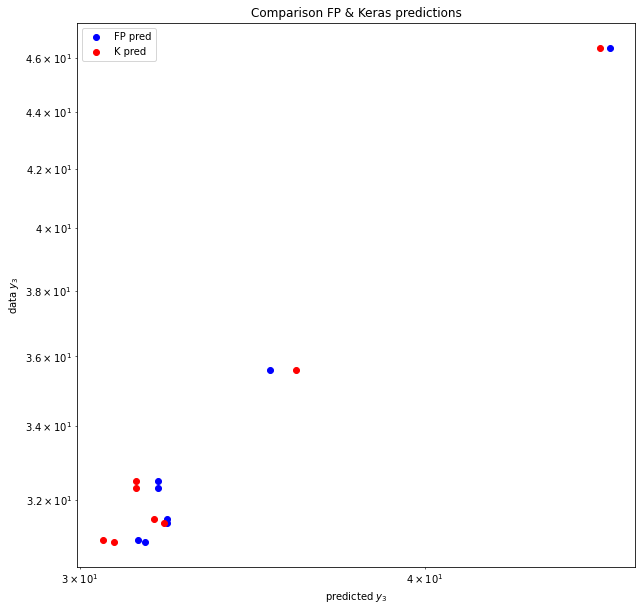

In [8]:
import matplotlib.pyplot as plt
yp_FP = [31.49, 32.01, 32.27, 31.682, 32.012, 32.27, 35.17, 46.68]
yp_K = [30.581, 31.44, 31.92, 30.87, 31.44, 32.195, 35.92, 46.28]
ydata = [30.97, 32.3, 31.5, 30.91, 32.5, 31.4, 35.59, 46.4]

plt.figure(figsize=(10,10))
plt.scatter(yp_FP, ydata, c='b', label = 'FP pred')
plt.scatter(yp_K, ydata, c='r', label = 'K pred')
plt.title('Comparison FP & Keras predictions')
plt.xlabel(r"predicted $y_3$")
plt.ylabel(r"data $y_3$")
plt.legend()
plt.loglog()
#plt.xlim(xmax = 50, xmin = 30)
#plt.ylim(ymax = 50, ymin = 30)
plt.show()


# Part 2

# Code P2.3


In [9]:
'''>>>>> start CodeP2.3
    V.P. Carey ME249, Spring 2021

Intro to Neural Network Modeling 
Data arrays for hybrid solar/fossil-fuel gas turbine power system'''

'''
#create input data array, normalizing input temp
#T1(K), gamma, , qsol(kW):
xdata = []
xdata =  [[ 318.0 , 0.0 , 500.0 ], [ 318.0 , 0.0 , 1000.0 ]]
xdata.append([ 318.0 , 0.0 , 1500.0 ])
xdata.append([ 318.0 , 0.0 , 2000.0 ])
xdata.append([ 318.0 , 0.0 , 2500.0 ])
xdata.append([ 318.0 , 0.25 , 500.0 ])
xdata.append([ 318.0 , 0.25 , 1000.0 ])
xdata.append([ 318.0 , 0.25 , 1500.0 ])
xdata.append([ 318.0 , 0.25 , 2000.0 ])
xdata.append([ 318.0 , 0.25 , 2500.0 ])
xdata.append([ 318.0 , 0.5 , 500.0 ])
xdata.append([ 318.0 , 0.5 , 1000.0 ])
xdata.append([ 318.0 , 0.5 , 1500.0 ])
xdata.append([ 318.0 , 0.5 , 2000.0 ])
xdata.append([ 318.0 , 0.5 , 2500.0 ])
  
xdata.append([ 303.0 , 0.0 , 500.0 ])
xdata.append([ 303.0 , 0.0 , 1000.0 ])
xdata.append([ 303.0 , 0.0 , 1500.0 ])
xdata.append([ 303.0 , 0.0 , 2000.0 ])
xdata.append([ 303.0 , 0.0 , 2500.0 ])
xdata.append([ 303.0 , 0.25 , 500.0 ])
xdata.append([ 303.0 , 0.25 , 1000.0 ])
xdata.append([ 303.0 , 0.25 , 1500.0 ])
xdata.append([ 303.0 , 0.25 , 2000.0 ])
xdata.append([ 303.0 , 0.25 , 2500.0 ])
xdata.append([ 303.0 , 0.5 , 500.0 ])
xdata.append([ 303.0 , 0.5 , 1000.0 ])
xdata.append([ 303.0 , 0.5 , 1500.0 ])
xdata.append([ 303.0 , 0.5 , 2000.0 ])
xdata.append([ 303.0 , 0.5 , 2500.0 ])
  
xdata.append([ 288.0 , 0.0 , 500.0 ])
xdata.append([ 288.0 , 0.0 , 1000.0 ])
xdata.append([ 288.0 , 0.0 , 1500.0 ])
xdata.append([ 288.0 , 0.0 , 2000.0 ])
xdata.append([ 288.0 , 0.0 , 2500.0 ])
xdata.append([ 288.0 , 0.25 , 500.0 ])
xdata.append([ 288.0 , 0.25 , 1000.0 ])
xdata.append([ 288.0 , 0.25 , 1500.0 ])
xdata.append([ 288.0 , 0.25 , 2000.0 ])
xdata.append([ 288.0 , 0.25 , 2500.0 ])
xdata.append([ 288.0 , 0.5 , 500.0 ])
xdata.append([ 288.0 , 0.5 , 1000.0 ])
xdata.append([ 288.0 , 0.5 , 1500.0 ])
xdata.append([ 288.0 , 0.5 , 2000.0 ])
xdata.append([ 288.0 , 0.5 , 2500.0 ])
  
xdata.append([ 268.0 , 0.0 , 500.0 ])
xdata.append([ 268.0 , 0.0 , 1000.0 ])
xdata.append([ 268.0 , 0.0 , 1500.0 ])
xdata.append([ 268.0 , 0.0 , 2000.0 ])
xdata.append([ 268.0 , 0.0 , 2500.0 ])
xdata.append([ 268.0 , 0.25 , 500.0 ])
xdata.append([ 268.0 , 0.25 , 1000.0 ])
xdata.append([ 268.0 , 0.25 , 1500.0 ])
xdata.append([ 268.0 , 0.25 , 2000.0 ])
xdata.append([ 268.0 , 0.25 , 2500.0 ])
xdata.append([ 268.0 , 0.5 , 500.0 ])
xdata.append([ 268.0 , 0.5 , 1000.0 ])
xdata.append([ 268.0 , 0.5 , 1500.0 ])
xdata.append([ 268.0 , 0.5 , 2000.0 ])
xdata.append([ 268.0 , 0.5 , 2500.0 ])
  '''

'''
ydata =  [[ 35.1316 , 0.3808 ],[ 40.3764 , 0.38686 ]]
ydata.append([ 47.4620 , 0.3930 ])
ydata.append([ 57.5639 , 0.39949 ])
ydata.append([ 73.1286 , 0.40612 ])
ydata.append([ 49.1110 , 0.4023 ])
ydata.append([ 56.4428 , 0.40605 ])
ydata.append([ 66.3479 , 0.4098 ])
ydata.append([ 80.4695 , 0.413 ])
ydata.append([ 102.2276 , 0.4175 ])
ydata.append([ 63.0904 , 0.41540 ])
ydata.append([ 72.5092 , 0.4175 ])
ydata.append([ 85.2338, 0.4197 ])
ydata.append([ 103.3750 , 0.42192 ])
ydata.append([ 131.3266 , 0.4242 ])
  
ydata.append([ 34.273 , 0.3952 ])
ydata.append([ 38.99026 , 0.4012 ])
ydata.append([ 45.2133, 0.4073 ])
ydata.append([ 53.8000 , 0.4136 ])
ydata.append([ 66.4130 , 0.4201 ])
ydata.append([ 47.922 , 0.4178 ])
ydata.append([ 54.518 , 0.4215 ])
ydata.append([ 63.220 , 0.4252 ])
ydata.append([ 75.226 , 0.4290 ])
ydata.append([ 92.862 , 0.4329 ])
ydata.append([ 61.572 , 0.4315 ])
ydata.append([ 70.0468 , 0.43373 ])
ydata.append([ 81.226 , 0.43597 ])
ydata.append([ 96.653 , 0.4382 ])
ydata.append([ 119.3124 , 0.44045 ])
  
ydata.append([ 33.4521 , 0.40913 ])
ydata.append([ 37.6911, 0.4150 ])
ydata.append([ 43.1602 , 0.4209 ])
ydata.append([ 50.4858 , 0.4271 ])
ydata.append([ 60.8067 , 0.4334 ])
ydata.append([ 46.7865 , 0.4328 ])
ydata.append([ 52.7151 , 0.43646 ])
ydata.append([ 60.36425 , 0.44016 ])
ydata.append([ 70.6099 , 0.443926 ])
ydata.append([ 85.0447 , 0.4477 ])
ydata.append([ 60.1208 , 0.44721 ])
ydata.append([ 67.7391 , 0.44940 ])
ydata.append([ 77.56830 , 0.4516 ])
ydata.append([ 90.73410 , 0.4538 ])
ydata.append([ 109.2828 , 0.4560 ])
  
ydata.append([ 32.4123 , 0.42694 ])
ydata.append([ 36.0807 , 0.4325 ])
ydata.append([ 40.6854 , 0.4383 ])
ydata.append([ 46.6374 , 0.4442 ])
ydata.append([ 54.6293 , 0.4503 ])
ydata.append([ 45.3472 , 0.4519 ])
ydata.append([ 50.4796 , 0.4555 ])
ydata.append([ 56.9219 , 0.4591 ])
ydata.append([ 65.2492 , 0.4628 ])
ydata.append([ 76.4304 , 0.4665 ])
ydata.append([ 58.2822 , 0.4672 ])
ydata.append([ 64.8785 , 0.4693 ])
ydata.append([ 73.1584 , 0.4715 ])
ydata.append([ 83.8610 , 0.4738 ])
ydata.append([ 98.2316 , 0.4760 ])
  '''

'\nydata =  [[ 35.1316 , 0.3808 ],[ 40.3764 , 0.38686 ]]\nydata.append([ 47.4620 , 0.3930 ])\nydata.append([ 57.5639 , 0.39949 ])\nydata.append([ 73.1286 , 0.40612 ])\nydata.append([ 49.1110 , 0.4023 ])\nydata.append([ 56.4428 , 0.40605 ])\nydata.append([ 66.3479 , 0.4098 ])\nydata.append([ 80.4695 , 0.413 ])\nydata.append([ 102.2276 , 0.4175 ])\nydata.append([ 63.0904 , 0.41540 ])\nydata.append([ 72.5092 , 0.4175 ])\nydata.append([ 85.2338, 0.4197 ])\nydata.append([ 103.3750 , 0.42192 ])\nydata.append([ 131.3266 , 0.4242 ])\n  \nydata.append([ 34.273 , 0.3952 ])\nydata.append([ 38.99026 , 0.4012 ])\nydata.append([ 45.2133, 0.4073 ])\nydata.append([ 53.8000 , 0.4136 ])\nydata.append([ 66.4130 , 0.4201 ])\nydata.append([ 47.922 , 0.4178 ])\nydata.append([ 54.518 , 0.4215 ])\nydata.append([ 63.220 , 0.4252 ])\nydata.append([ 75.226 , 0.4290 ])\nydata.append([ 92.862 , 0.4329 ])\nydata.append([ 61.572 , 0.4315 ])\nydata.append([ 70.0468 , 0.43373 ])\nydata.append([ 81.226 , 0.43597 ])\nyd

# Code P2.4r

In [10]:
'''>>>>> start CodeP2.4
    V.P. Carey ME249, Spring 2021

Intro to Neural Network Modeling 
Keras model for hybrid solar/fossil-fuel gas turbine power system'''

#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#import copy
from copy import copy, deepcopy
#the follwoing 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#create input data array
# meadian values of input variables
Tmed = 293.
gamed = 0.25
qsmed = 1250.
#T1(K), gamma, , qsol(kW):
xdata = []
xdata =  [[ 318.0, 0.0, 500.0], [ 318.0, 0.0, 1000.0]]
xdata.append([ 318.0, 0.0, 1500.0])
xdata.append([ 318.0, 0.0, 2000.0])
xdata.append([ 318.0, 0.0, 2500.0])
xdata.append([ 318.0 , 0.25 , 500.0 ])
xdata.append([ 318.0 , 0.25 , 1000.0 ])
xdata.append([ 318.0 , 0.25 , 1500.0 ])
xdata.append([ 318.0 , 0.25 , 2000.0 ])
xdata.append([ 318.0 , 0.25 , 2500.0 ])
xdata.append([ 318.0 , 0.5 , 500.0 ])
xdata.append([ 318.0 , 0.5 , 1000.0 ])
xdata.append([ 318.0 , 0.5 , 1500.0 ])
xdata.append([ 318.0 , 0.5 , 2000.0 ])
xdata.append([ 318.0 , 0.5 , 2500.0 ])
  
xdata.append([ 303.0 , 0.0 , 500.0 ])
xdata.append([ 303.0 , 0.0 , 1000.0 ])
xdata.append([ 303.0 , 0.0 , 1500.0 ])
xdata.append([ 303.0 , 0.0 , 2000.0 ])
xdata.append([ 303.0 , 0.0 , 2500.0 ])
xdata.append([ 303.0 , 0.25 , 500.0 ])
xdata.append([ 303.0 , 0.25 , 1000.0 ])
xdata.append([ 303.0 , 0.25 , 1500.0 ])
xdata.append([ 303.0 , 0.25 , 2000.0 ])
xdata.append([ 303.0 , 0.25 , 2500.0 ])
xdata.append([ 303.0 , 0.5 , 500.0 ])
xdata.append([ 303.0 , 0.5 , 1000.0 ])
xdata.append([ 303.0 , 0.5 , 1500.0 ])
xdata.append([ 303.0 , 0.5 , 2000.0 ])
xdata.append([ 303.0 , 0.5 , 2500.0 ])
  
xdata.append([ 288.0 , 0.0 , 500.0 ])
xdata.append([ 288.0 , 0.0 , 1000.0 ])
xdata.append([ 288.0 , 0.0 , 1500.0 ])
xdata.append([ 288.0 , 0.0 , 2000.0 ])
xdata.append([ 288.0 , 0.0 , 2500.0 ])
xdata.append([ 288.0 , 0.25 , 500.0 ])
xdata.append([ 288.0 , 0.25 , 1000.0 ])
xdata.append([ 288.0 , 0.25 , 1500.0 ])
xdata.append([ 288.0 , 0.25 , 2000.0 ])
xdata.append([ 288.0 , 0.25 , 2500.0 ])
xdata.append([ 288.0 , 0.5 , 500.0 ])
xdata.append([ 288.0 , 0.5 , 1000.0 ])
xdata.append([ 288.0 , 0.5 , 1500.0 ])
xdata.append([ 288.0 , 0.5 , 2000.0 ])
xdata.append([ 288.0 , 0.5 , 2500.0 ])
  
xdata.append([ 268.0 , 0.0 , 500.0 ])
xdata.append([ 268.0 , 0.0 , 1000.0 ])
xdata.append([ 268.0 , 0.0 , 1500.0 ])
xdata.append([ 268.0 , 0.0 , 2000.0 ])
xdata.append([ 268.0 , 0.0 , 2500.0 ])
xdata.append([ 268.0 , 0.25 , 500.0 ])
xdata.append([ 268.0 , 0.25 , 1000.0 ])
xdata.append([ 268.0 , 0.25 , 1500.0 ])
xdata.append([ 268.0 , 0.25 , 2000.0 ])
xdata.append([ 268.0 , 0.25 , 2500.0 ])
xdata.append([ 268.0 , 0.5 , 500.0 ])
xdata.append([ 268.0 , 0.5 , 1000.0 ])
xdata.append([ 268.0 , 0.5 , 1500.0 ])
xdata.append([ 268.0 , 0.5 , 2000.0 ])
xdata.append([ 268.0 , 0.5 , 2500.0 ])
'''#convert to:
xdata =  [[ 318.0/Tmed , 0.0/gamed , 500.0/qsmed ], [ 318.0/Tmed , 0.0/gamed , 1000.0/qsmed ]]
xdata.append([ 318.0/Tmed  , 0.0/gamed , 1500.0/qsmed ])
xdata.append([ 318.0/Tmed  , 0.0/gamed , 2000.0/qsmed ])
xdata.append([ 318.0/Tmed  , 0.0/gamed , 2500.0/qsmed ])'''

xarray= np.array(xdata)

# meadian values of output variables
almed = 60.
efmed = 0.4
# alpha, effsys
ydata = []
ydata =  [[ 35.1316, 0.3808], [ 40.3764, 0.38686]]
ydata.append([ 47.4620, 0.3930])
ydata.append([ 57.5639, 0.39949])
ydata.append([ 73.1286, 0.40612])
ydata.append([ 49.1110 , 0.4023 ])
ydata.append([ 56.4428 , 0.40605 ])
ydata.append([ 66.3479 , 0.4098 ])
ydata.append([ 80.4695 , 0.413 ])
ydata.append([ 102.2276 , 0.4175 ])
ydata.append([ 63.0904 , 0.41540 ])
ydata.append([ 72.5092 , 0.4175 ])
ydata.append([ 85.2338, 0.4197 ])
ydata.append([ 103.3750 , 0.42192 ])
ydata.append([ 131.3266 , 0.4242 ])
  
ydata.append([ 34.273 , 0.3952 ])
ydata.append([ 38.99026 , 0.4012 ])
ydata.append([ 45.2133, 0.4073 ])
ydata.append([ 53.8000 , 0.4136 ])
ydata.append([ 66.4130 , 0.4201 ])
ydata.append([ 47.922 , 0.4178 ])
ydata.append([ 54.518 , 0.4215 ])
ydata.append([ 63.220 , 0.4252 ])
ydata.append([ 75.226 , 0.4290 ])
ydata.append([ 92.862 , 0.4329 ])
ydata.append([ 61.572 , 0.4315 ])
ydata.append([ 70.0468 , 0.43373 ])
ydata.append([ 81.226 , 0.43597 ])
ydata.append([ 96.653 , 0.4382 ])
ydata.append([ 119.3124 , 0.44045 ])
  
ydata.append([ 33.4521 , 0.40913 ])
ydata.append([ 37.6911, 0.4150 ])
ydata.append([ 43.1602 , 0.4209 ])
ydata.append([ 50.4858 , 0.4271 ])
ydata.append([ 60.8067 , 0.4334 ])
ydata.append([ 46.7865 , 0.4328 ])
ydata.append([ 52.7151 , 0.43646 ])
ydata.append([ 60.36425 , 0.44016 ])
ydata.append([ 70.6099 , 0.443926 ])
ydata.append([ 85.0447 , 0.4477 ])
ydata.append([ 60.1208 , 0.44721 ])
ydata.append([ 67.7391 , 0.44940 ])
ydata.append([ 77.56830 , 0.4516 ])
ydata.append([ 90.73410 , 0.4538 ])
ydata.append([ 109.2828 , 0.4560 ])
  
ydata.append([ 32.4123 , 0.42694 ])
ydata.append([ 36.0807 , 0.4325 ])
ydata.append([ 40.6854 , 0.4383 ])
ydata.append([ 46.6374 , 0.4442 ])
ydata.append([ 54.6293 , 0.4503 ])
ydata.append([ 45.3472 , 0.4519 ])
ydata.append([ 50.4796 , 0.4555 ])
ydata.append([ 56.9219 , 0.4591 ])
ydata.append([ 65.2492 , 0.4628 ])
ydata.append([ 76.4304 , 0.4665 ])
ydata.append([ 58.2822 , 0.4672 ])
ydata.append([ 64.8785 , 0.4693 ])
ydata.append([ 73.1584 , 0.4715 ])
ydata.append([ 83.8610 , 0.4738 ])
ydata.append([ 98.2316 , 0.4760 ])
'''#convert to:
ydata =  [[ 35.1316/almed , 0.3808/efmed ], [ 40.3764/almed , 0.38686/efmed ]]
ydata.append([ 47.4620/almed , 0.3930/efmed ])
ydata.append([ 57.5639/almed , 0.39949/efmed ])
ydata.append([ 73.1286/almed , 0.40612/efmed ])'''

xndata = deepcopy(xdata)
yndata = deepcopy(ydata)

#normalize the lists
for i in range(len(xndata)):
    xndata[i][0] = xndata[i][0]/Tmed 
    xndata[i][1] = xndata[i][1]/gamed 
    xndata[i][2] = xndata[i][2]/qsmed 
for i in range(len(yndata)):
    yndata[i][0] = yndata[i][0]/almed
    yndata[i][1] = yndata[i][1]/efmed  
    

yarray= np.array(ydata)
xnarray = np.array(xndata)
ynarray = np.array(yndata)
print ('yndata =',yndata)
print ('ynarray =',ynarray)
print ('xndata =',xndata)
print ('xnarray =',xnarray)

yndata = [[0.5855266666666666, 0.9520000000000001], [0.67294, 0.96715], [0.7910333333333334, 0.9825], [0.9593983333333332, 0.998725], [1.2188100000000002, 1.0152999999999999], [0.8185166666666667, 1.00575], [0.9407133333333333, 1.015125], [1.1057983333333332, 1.0245], [1.3411583333333332, 1.0325], [1.7037933333333333, 1.04375], [1.0515066666666668, 1.0385], [1.2084866666666667, 1.04375], [1.4205633333333334, 1.04925], [1.7229166666666667, 1.0548], [2.188776666666667, 1.0605], [0.5712166666666667, 0.988], [0.6498376666666666, 1.003], [0.753555, 1.0182499999999999], [0.8966666666666666, 1.034], [1.1068833333333332, 1.05025], [0.7987, 1.0445], [0.9086333333333333, 1.05375], [1.0536666666666668, 1.063], [1.2537666666666667, 1.0725], [1.5476999999999999, 1.08225], [1.0262, 1.0787499999999999], [1.1674466666666667, 1.084325], [1.3537666666666666, 1.089925], [1.6108833333333334, 1.0955], [1.98854, 1.101125], [0.557535, 1.0228249999999999], [0.628185, 1.0374999999999999], [0.7193366666666667, 

In [11]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .


from keras import backend as K
#initialize weights with values between -0.2 and 1.2
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(20, activation=K.relu, input_shape=[3],  kernel_initializer=initializer),
    keras.layers.Dense(40, activation=K.relu,  kernel_initializer=initializer),
    keras.layers.Dense(20, activation=K.relu, kernel_initializer=initializer),
    keras.layers.Dense(2,  kernel_initializer=initializer)
  ])



In [12]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers

sgd = tf.keras.optimizers.RMSprop(0.020)
model.compile(loss='mean_absolute_error',optimizer=rms, metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [24]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                     mode='min',  verbose=1, save_best_only=True)

import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_2040202_P4_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

historyData = model.fit(xnarray,ynarray,epochs=600,callbacks=[es, tensorboard_cb])


loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

#model.save('./rELU_iv_best')

Epoch 1/600
60/60 [==============================] - 0s 395us/step - loss: 0.0422 - root_mean_squared_error: 1.2594
Epoch 2/600
60/60 [==============================] - 0s 103us/step - loss: 0.0593 - root_mean_squared_error: 1.2584
Epoch 3/600
60/60 [==============================] - 0s 114us/step - loss: 0.0722 - root_mean_squared_error: 1.2574
Epoch 4/600
60/60 [==============================] - 0s 244us/step - loss: 0.0716 - root_mean_squared_error: 1.2565
Epoch 5/600
60/60 [==============================] - 0s 206us/step - loss: 0.0486 - root_mean_squared_error: 1.2555
Epoch 6/600
60/60 [==============================] - 0s 136us/step - loss: 0.0506 - root_mean_squared_error: 1.2545
Epoch 7/600
60/60 [==============================] - 0s 128us/step - loss: 0.0690 - root_mean_squared_error: 1.2535
Epoch 8/600
60/60 [==============================] - 0s 111us/step - loss: 0.0775 - root_mean_squared_error: 1.2525
Epoch 9/600
60/60 [==============================] - 0s 145us/step - los

60/60 [==============================] - 0s 94us/step - loss: 0.0666 - root_mean_squared_error: 1.1400
Epoch 142/600
60/60 [==============================] - 0s 116us/step - loss: 0.0335 - root_mean_squared_error: 1.1392
Epoch 143/600
60/60 [==============================] - 0s 99us/step - loss: 0.0386 - root_mean_squared_error: 1.1385
Epoch 144/600
60/60 [==============================] - 0s 97us/step - loss: 0.0782 - root_mean_squared_error: 1.1378
Epoch 145/600
60/60 [==============================] - 0s 104us/step - loss: 0.0632 - root_mean_squared_error: 1.1370
Epoch 146/600
60/60 [==============================] - 0s 100us/step - loss: 0.0479 - root_mean_squared_error: 1.1363
Epoch 147/600
60/60 [==============================] - 0s 90us/step - loss: 0.0634 - root_mean_squared_error: 1.1356
Epoch 148/600
60/60 [==============================] - 0s 107us/step - loss: 0.0525 - root_mean_squared_error: 1.1349
Epoch 149/600
60/60 [==============================] - 0s 100us/step - los

60/60 [==============================] - 0s 101us/step - loss: 0.0494 - root_mean_squared_error: 1.0917
Epoch 212/600
60/60 [==============================] - 0s 103us/step - loss: 0.0477 - root_mean_squared_error: 1.0911
Epoch 213/600
60/60 [==============================] - 0s 92us/step - loss: 0.0478 - root_mean_squared_error: 1.0904
Epoch 214/600
60/60 [==============================] - 0s 99us/step - loss: 0.0613 - root_mean_squared_error: 1.0898
Epoch 215/600
60/60 [==============================] - 0s 98us/step - loss: 0.0387 - root_mean_squared_error: 1.0892
Epoch 216/600
60/60 [==============================] - 0s 91us/step - loss: 0.0587 - root_mean_squared_error: 1.0885
Epoch 217/600
60/60 [==============================] - 0s 89us/step - loss: 0.0561 - root_mean_squared_error: 1.0879
Epoch 218/600
60/60 [==============================] - 0s 85us/step - loss: 0.0509 - root_mean_squared_error: 1.0872
Epoch 219/600
60/60 [==============================] - 0s 85us/step - loss: 

In [25]:
test = []
outpt=[]

#first point (row [0])comparison of data and prediction
# put in a loop to print comparion for all data points

test = [[ xnarray[0][0] , xnarray[0][1] , xnarray[0][2] ]]
testarray = np.array(test)
outpt = model.predict(testarray)
print ('row [0] data:  T1= ', xnarray[0][0]*Tmed, ', gam= ', xnarray[0][1]*gamed, \
    ', qsol= ', xnarray[0][2]*qsmed,', alpha= ', ynarray[0][0]*almed,\
    ',  predicted alpha = ', outpt[0][0]*almed)

#20th point (row [20])comparison of data and prediction
test = [[ xnarray[20][0] , xnarray[20][1] , xnarray[20][2] ]]
testarray = np.array(test)
outpt = model.predict(testarray)
print(outpt)
print ('row [20] data:  T1= ', xnarray[20][0]*Tmed, ', gam= ', xnarray[0][1]*gamed, \
    ', qsol= ', xnarray[20][2]*qsmed,', alpha= ', ynarray[20][0]*almed,\
    ',  predicted alpha = ', outpt[0][0]*almed)


row [0] data:  T1=  318.0 , gam=  0.0 , qsol=  500.0 , alpha=  35.1316 ,  predicted alpha =  34.615023136138916
[[0.79786915 1.0543437 ]]
row [20] data:  T1=  303.0 , gam=  0.0 , qsol=  500.0 , alpha=  47.922 ,  predicted alpha =  47.872148752212524


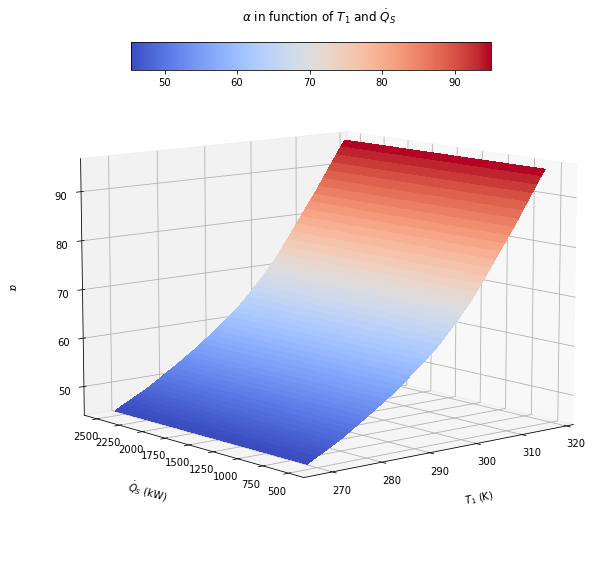

In [26]:
#Predictions for T_1 between 268 & 318 K, Qdot_S between 500 & 2500 kW and gamma = 0.25
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mticker
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams
from matplotlib import cm
import sys

T_1 = np.linspace(268, 318, 1000)
Qdot_S = np.linspace(500, 2500, 1000)
gamma = 0.25*np.ones(1000)


#Normalization
T_1n = T_1/Tmed
Qdot_Sn = Qdot_S/qsmed
gamman = gamma/gamed



Xtest, Ytest = np.meshgrid(T_1n, Qdot_Sn)

#Getting the predicted alpha by the model:
alpha_pred = []
for i in range(len(T_1)):
    xrow = [[T_1n[i] , gamman[i] ,  Qdot_Sn[i]]]
    out = model.predict(np.array(xrow))
    alpha_pred.append(out[0][0]*almed)
    
X, Y = np.meshgrid(T_1, Qdot_S)
Z = alpha_pred + X + Y - X - Y
#print(alpha_pred)

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, linewidth=0, antialiased = False)

cax = fig.add_axes([0.25, .82, 0.5, 0.04])
fig.colorbar(surf, orientation='horizontal', cax=cax)
#for ii in range(0,360,1):
  #  ax.view_init(elev=10., azim=ii)
  #  savefig("movie%d.png" % ii)
ax.set_xlabel(r"$T_1$ (K)")
ax.set_ylabel(r"$\dot{Q}_S$ (kW)")
ax.set_zlabel(r"$\alpha$")
ax.set_title(r"$\alpha$ in function of $T_1$ and $\dot{Q}_S$")
rcParams['axes.labelpad'] = 20

ax.azim = -130
ax.dist=10
ax.elev=10


plt.show()



# Task 2.3, a)

In [27]:
#Getting the predicted alpha by the model:
alpha_pred = []
for i in range(len(xnarray)):
    xrow = [[xnarray[i][0] , xnarray[i][1] , xnarray[i][2]]]
    out = model.predict(np.array(xrow))
    alpha_pred.append(out[0][0]*almed) 
print(alpha_pred)


[34.615023136138916, 39.82892990112305, 47.52585768699646, 57.67881989479065, 68.84229183197021, 49.168174266815186, 55.95137000083923, 64.90874290466309, 78.71795654296875, 95.63441276550293, 64.16476249694824, 71.32198333740234, 84.51779365539551, 101.84865474700928, 119.74534034729004, 34.059226512908936, 38.63239645957947, 46.085604429244995, 55.28218746185303, 66.50331974029541, 47.872148752212524, 54.37226057052612, 62.910475730895996, 76.09259605407715, 92.89488315582275, 62.61399507522583, 69.56020832061768, 81.95374488830566, 99.21758651733398, 116.99013233184814, 33.50342631340027, 37.53079533576965, 44.24354553222656, 52.98056960105896, 64.19729232788086, 46.67523264884949, 53.018717765808105, 61.30690097808838, 73.47531795501709, 90.15533924102783, 61.03468894958496, 68.10873985290527, 79.51306343078613, 96.5811824798584, 114.23489570617676, 32.78693675994873, 36.44030570983887, 42.00899004936218, 50.15859603881836, 61.13828659057617, 45.0758957862854, 51.2591814994812, 59.

In [28]:
#Now we can plot the test alpha vs. predicted alpha on a log-log scale

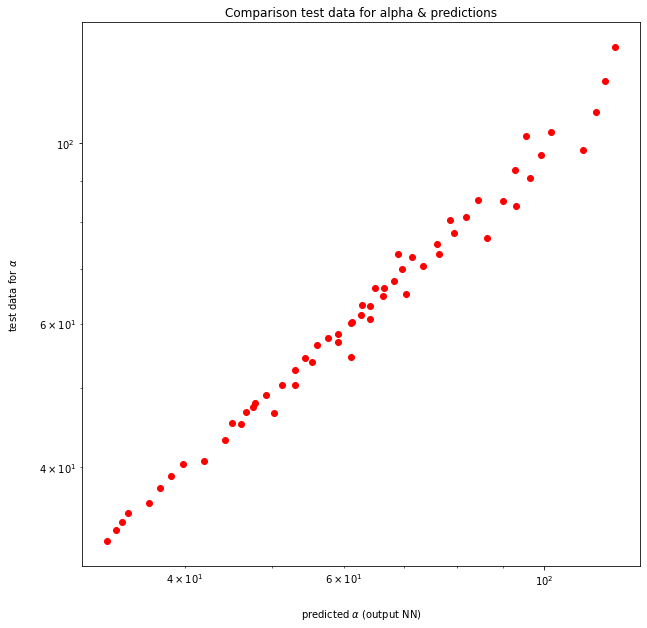

In [29]:
alpha_data = [ydata[i][0] for i in range(len(ydata))]
#print(alpha_data)

#Plotting with log-log scale
plt.figure(figsize=(10,10))
plt.scatter(alpha_pred, alpha_data, c='r')
plt.title('Comparison test data for alpha & predictions')
plt.xlabel(r"predicted $\alpha$ (output NN)")
plt.ylabel(r"test data for $\alpha$")
plt.loglog()
#plt.xlim(xmax = 50, xmin = 30)
#plt.ylim(ymax = 50, ymin = 30)
plt.show()

In [34]:
rmse=0
for i in range(len(alpha_pred)):
    rmse = 0
    rmse += ((alpha_pred[i] - alpha_data[i]) ** 2)
rmse = np.sqrt(rmse/len(alpha_pred))
print(rmse)   

9.662836828283917


# 2.3) b)

In [35]:
#Collecting the data for one day
xdata = []
xdata.append([287.0 , 0.0 , 500.0 ])
xdata.append([ 295.0 , 0.0 , 750.0 ])
xdata.append([ 301.0 , 0.0 , 1000.0 ])
xdata.append([ 305.0 , 0.0 , 2450.0 ])
xdata.append([ 307.0 , 0.0 , 2600.0 ])
xdata.append([ 308.0 , 0.0 , 2400.0 ])
xdata.append([ 308.0 , 0.0 , 2100.0 ])
xdata.append([ 305.0 , 0.0 , 1800.0 ])
xdata.append([ 295.0 , 0.0 , 1300.0 ])
xdata.append([ 292.0 , 0.0 , 800.0 ])
xdata.append([ 295.0 , 0.0 , 250.0 ])

xndata = deepcopy(xdata)
for i in range(len(xndata)):
    xndata[i][0] = xndata[i][0]/Tmed 
    xndata[i][1] = xndata[i][1]/gamed 
    xndata[i][2] = xndata[i][2]/qsmed 
    
alpha_pred = []
for i in range(len(xndata)):
    xrow = [[xndata[i][0] , xndata[i][1] , xndata[i][2]]]
    out = model.predict(np.array(xrow))
    alpha_pred.append(out[0][0]*almed) 
    
xdata5 = []
xdata5.append([287.0 , 0.5 , 500.0 ])
xdata5.append([ 295.0 , 0.5 , 750.0 ])
xdata5.append([ 301.0 , 0.5 , 1000.0 ])
xdata5.append([ 305.0 , 0.5 , 2450.0 ])
xdata5.append([ 307.0 , 0.5 , 2600.0 ])
xdata5.append([ 308.0 , 0.5 , 2400.0 ])
xdata5.append([ 308.0 , 0.5 , 2100.0 ])
xdata5.append([ 305.0 , 0.5 , 1800.0 ])
xdata5.append([ 295.0 , 0.5 , 1300.0 ])
xdata5.append([ 292.0 , 0.5 , 800.0 ])
xdata5.append([ 295.0 , 0.5 , 250.0 ])

xndata5 = deepcopy(xdata5)
for i in range(len(xndata)):
    xndata5[i][0] = xndata5[i][0]/Tmed 
    xndata5[i][1] = xndata5[i][1]/gamed 
    xndata5[i][2] = xndata5[i][2]/qsmed 
alpha_pred5 = []
for i in range(len(xndata)):
    xrow = [[xndata5[i][0] , xndata5[i][1] , xndata5[i][2]]]
    out = model.predict(np.array(xrow))
    alpha_pred5.append(out[0][0]*almed) 
print(alpha_pred5)
print(alpha_pred)

[60.92717170715332, 65.19277811050415, 69.33461666107178, 115.76961994171143, 120.87661743164062, 114.49562072753906, 103.6952018737793, 92.35814094543457, 74.97347831726074, 65.62671661376953, 58.66629123687744]
[33.4663724899292, 35.75382113456726, 38.47944259643555, 65.74758052825928, 69.48609352111816, 65.03492832183838, 58.13528895378113, 51.61608695983887, 41.94771409034729, 36.005104780197144, 31.04239583015442]


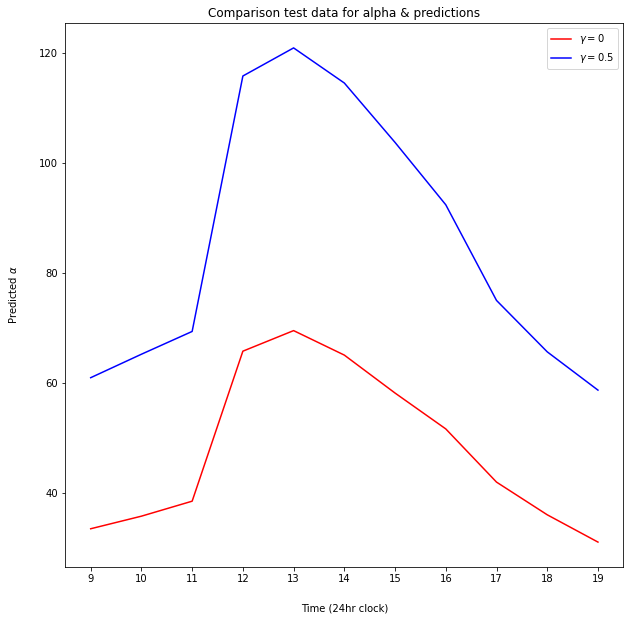

In [36]:
#Plotting alpha vs time

#Plotting with log-log scale
plt.figure(figsize=(10,10))
x = np.linspace(9, 19, 11)
plt.plot(x, alpha_pred, c='r', label=r"$\gamma = 0$")
plt.plot(x, alpha_pred5, c='b', label=r"$\gamma = 0.5$")

plt.title('Comparison test data for alpha & predictions')
plt.xlabel(r"Time (24hr clock)")
plt.ylabel(r"Predicted $\alpha$")
plt.legend()
plt.xticks([9,10,11,12,13,14,15,16,17,18,19]) #Time of the day in hours
plt.show()

